# Keras TF 2.0 - Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
#IMPORTING LIBRARIES AND READING DATA
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

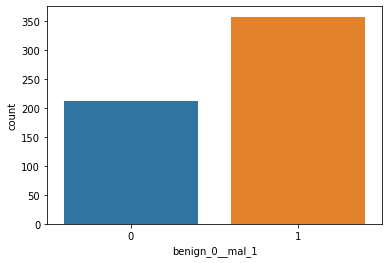

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

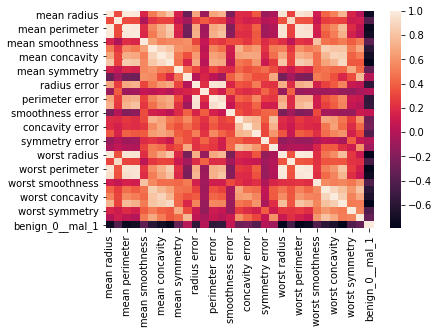

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

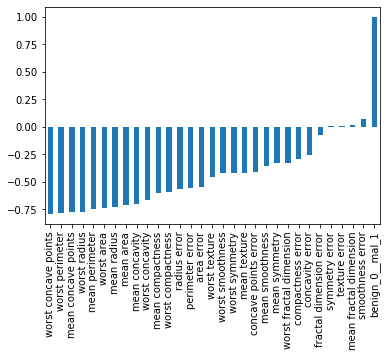

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

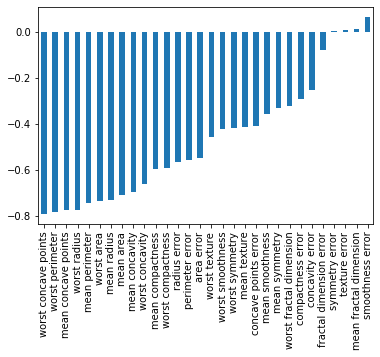

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [6]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [14]:
X_train.shape

(426, 30)

In [23]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=15,activation='tanh'))#ADDING ONE EXTRA HIDDEN LAYER with activation function as tanh
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

## Training the Model 


In [24]:
%%time
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,#REDUCING EPOCHS BY 200
          validation_data=(X_test, y_test)
          )

Epoch 1/400
14/14 [==============================] - 1s 17ms/step - loss: 0.7035 - accuracy: 0.3975 - val_loss: 0.6628 - val_accuracy: 0.6923
Epoch 2/400
14/14 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.7700 - val_loss: 0.6209 - val_accuracy: 0.8741
Epoch 3/400
14/14 [==============================] - 0s 6ms/step - loss: 0.6096 - accuracy: 0.8891 - val_loss: 0.5738 - val_accuracy: 0.9021
Epoch 4/400
14/14 [==============================] - 0s 5ms/step - loss: 0.5596 - accuracy: 0.9050 - val_loss: 0.5092 - val_accuracy: 0.9231
Epoch 5/400
14/14 [==============================] - 0s 5ms/step - loss: 0.4914 - accuracy: 0.8996 - val_loss: 0.4381 - val_accuracy: 0.9231
Epoch 6/400
14/14 [==============================] - 0s 6ms/step - loss: 0.4343 - accuracy: 0.8853 - val_loss: 0.3725 - val_accuracy: 0.9301
Epoch 7/400
14/14 [==============================] - 0s 5ms/step - loss: 0.3597 - accuracy: 0.9060 - val_loss: 0.3146 - val_accuracy: 0.9371
Epoch 8/400


Epoch 59/400
14/14 [==============================] - 0s 6ms/step - loss: 0.0758 - accuracy: 0.9645 - val_loss: 0.1093 - val_accuracy: 0.9650
Epoch 60/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0415 - accuracy: 0.9861 - val_loss: 0.1559 - val_accuracy: 0.9580
Epoch 61/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0558 - accuracy: 0.9745 - val_loss: 0.1034 - val_accuracy: 0.9720
Epoch 62/400
14/14 [==============================] - 0s 6ms/step - loss: 0.0451 - accuracy: 0.9846 - val_loss: 0.1274 - val_accuracy: 0.9650
Epoch 63/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0542 - accuracy: 0.9775 - val_loss: 0.1132 - val_accuracy: 0.9650
Epoch 64/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0449 - accuracy: 0.9907 - val_loss: 0.1258 - val_accuracy: 0.9650
Epoch 65/400
14/14 [==============================] - 0s 6ms/step - loss: 0.0457 - accuracy: 0.9845 - val_loss: 0.1201 - val_accuracy: 0.9650
Epoch 

14/14 [==============================] - 0s 6ms/step - loss: 0.0360 - accuracy: 0.9770 - val_loss: 0.1350 - val_accuracy: 0.9650
Epoch 117/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0477 - accuracy: 0.9815 - val_loss: 0.2170 - val_accuracy: 0.9231
Epoch 118/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0545 - accuracy: 0.9564 - val_loss: 0.1647 - val_accuracy: 0.9510
Epoch 119/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.9884 - val_loss: 0.1564 - val_accuracy: 0.9650
Epoch 120/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 0.9684 - val_loss: 0.1335 - val_accuracy: 0.9650
Epoch 121/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 0.9828 - val_loss: 0.1569 - val_accuracy: 0.9371
Epoch 122/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.9842 - val_loss: 0.1638 - val_accuracy: 0.9510
Epoch 123/400

14/14 [==============================] - 0s 5ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.1806 - val_accuracy: 0.9510
Epoch 174/400
14/14 [==============================] - 0s 6ms/step - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.2262 - val_accuracy: 0.9371
Epoch 175/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.9945 - val_loss: 0.2275 - val_accuracy: 0.9441
Epoch 176/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 0.9877 - val_loss: 0.2120 - val_accuracy: 0.9371
Epoch 177/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 0.9985 - val_loss: 0.1653 - val_accuracy: 0.9510
Epoch 178/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0093 - accuracy: 0.9992 - val_loss: 0.2017 - val_accuracy: 0.9510
Epoch 179/400
14/14 [==============================] - 0s 6ms/step - loss: 0.0110 - accuracy: 0.9992 - val_loss: 0.1664 - val_accuracy: 0.9510
Epoch 180/400

14/14 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2103 - val_accuracy: 0.9441
Epoch 231/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.2984 - val_accuracy: 0.9371
Epoch 232/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.1778 - val_accuracy: 0.9510
Epoch 233/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 0.9951 - val_loss: 0.1907 - val_accuracy: 0.9580
Epoch 234/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9866 - val_loss: 0.4758 - val_accuracy: 0.9161
Epoch 235/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9884 - val_loss: 0.3370 - val_accuracy: 0.9231
Epoch 236/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.9912 - val_loss: 0.1475 - val_accuracy: 0.9650
Epoch 237/400

14/14 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.2989 - val_accuracy: 0.9371
Epoch 288/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2394 - val_accuracy: 0.9510
Epoch 289/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.2255 - val_accuracy: 0.9510
Epoch 290/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0200 - accuracy: 0.9919 - val_loss: 0.2315 - val_accuracy: 0.9580
Epoch 291/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.2805 - val_accuracy: 0.9510
Epoch 292/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 0.9931 - val_loss: 0.2136 - val_accuracy: 0.9580
Epoch 293/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0103 - accuracy: 0.9953 - val_loss: 0.2597 - val_accuracy: 0.9441
Epoch 294/400

14/14 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3006 - val_accuracy: 0.9510
Epoch 345/400
14/14 [==============================] - 0s 6ms/step - loss: 6.8181e-04 - accuracy: 1.0000 - val_loss: 0.2999 - val_accuracy: 0.9510
Epoch 346/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3094 - val_accuracy: 0.9441
Epoch 347/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3218 - val_accuracy: 0.9371
Epoch 348/400
14/14 [==============================] - 0s 5ms/step - loss: 9.4786e-04 - accuracy: 1.0000 - val_loss: 0.2996 - val_accuracy: 0.9510
Epoch 349/400
14/14 [==============================] - 0s 4ms/step - loss: 8.2616e-04 - accuracy: 1.0000 - val_loss: 0.3331 - val_accuracy: 0.9371
Epoch 350/400
14/14 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 0.9982 - val_loss: 0.2449 - val_accuracy: 0.9510
E

14/14 [==============================] - 0s 5ms/step - loss: 5.7506e-04 - accuracy: 1.0000 - val_loss: 0.3291 - val_accuracy: 0.9441
Wall time: 29 s


In [25]:
model_loss = pd.DataFrame(model.history.history)

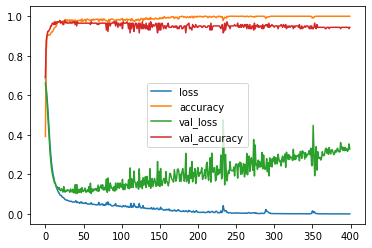

In [26]:
model_loss.plot()

## Early Stopping



In [38]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=7,activation='relu'))#ADDING ONE MORE HIDDEN LAYER
model.add(Dense(units=3,activation='relu'))#ADDING ONE MORE HIDDEN LAYER
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [41]:
%%time
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,#CHANGING NUMBER OF EPOCHS
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/500
14/14 [==============================] - 1s 15ms/step - loss: 0.6882 - val_loss: 0.6762
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6700 - val_loss: 0.6583
Epoch 3/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6527 - val_loss: 0.6362
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6271 - val_loss: 0.6067
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5875 - val_loss: 0.5543
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5447 - val_loss: 0.5193
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5131 - val_loss: 0.4897
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4875 - val_loss: 0.4632
Epoch 9/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4551 - val_loss: 0.4412
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4166 - val_loss: 0.4177
Epoch 11

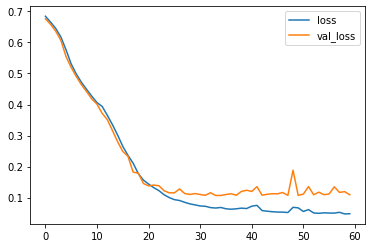

In [42]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [43]:
from tensorflow.keras.layers import Dropout

In [51]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.3))#CHANGING DROPOUT PARAMETERS

model.add(Dense(units=15,activation='tanh'))
model.add(Dropout(0.2))#CHANGING DROPOUT PARAMETERS

model.add(Dense(units=15,activation='relu'))#ADDING ONE MORE LAYER

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
%%time
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6723 - val_loss: 0.6493
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6278 - val_loss: 0.6106
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5938 - val_loss: 0.5661
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5660 - val_loss: 0.5172
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5167 - val_loss: 0.4686
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4661 - val_loss: 0.4183
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4439 - val_loss: 0.3687
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4041 - val_loss: 0.3164
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3518 - val_loss: 0.2764
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3321 - val_loss: 0.2521
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0658 - val_loss: 0.1116
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0368 - val_loss: 0.1062
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0557 - val_loss: 0.1128
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0579 - val_loss: 0.1123
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0662 - val_loss: 0.0955
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0534 - val_loss: 0.0910
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0564 - val_loss: 0.1063
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0431 - val_loss: 0.0968
Epoch 00090: early stopping
Wall time: 7.66 s


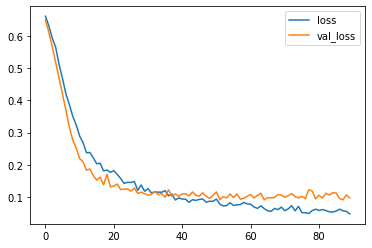

In [54]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


# Model Evaluation

In [35]:
predictions = model.predict_classes(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.97      0.99      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [38]:
print(confusion_matrix(y_test,predictions))

[[52  3]
 [ 1 87]]
